# Experiments Results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%cd /Users/maryamalki/Desktop/PyRICE_2022

/Users/maryamalki/Desktop/PyRICE_2022


In [3]:
# Load regions and years
regions = ['US','OECD-Europe','Japan','Russia','Non-Russia Eurasia','China','India','Middle East','Africa','Latin America','OHI','Other non-OECD Asia']
years = list(range(2005, 2310, 10))

In [4]:
# Experiments list CI and EI
exp_list= ['LL', 'LM', 'LH', 'MH', 'MM', 'ML', 'HL','HM','HH']

In [5]:
# Setting the font 
plt.rcParams['axes.titlepad'] = 25 
font = {'family':'Alegreya Sans',
        'weight':'normal',
        'size'  : 8}

plt.rc('font', **font)
%matplotlib inline

## Temperature Increase

In [6]:
# Setting up temp increase dataframe
ti_df = pd.DataFrame()

# Load and concatonate temperature increase from different experiments
for exp in range (len(exp_list)):
    ti = pd.read_excel(f'results/ti_{exp_list[exp]}.xlsx', index_col='Unnamed: 0')

    # Rename based on experiment name
    ti.rename(index={'Atmospheric temperature':f'{exp_list[exp]}'}, inplace = True)
    ti_df = pd.concat([ti_df,ti], axis = 0)

# Transpose before plotting
ti_df = ti_df.transpose()

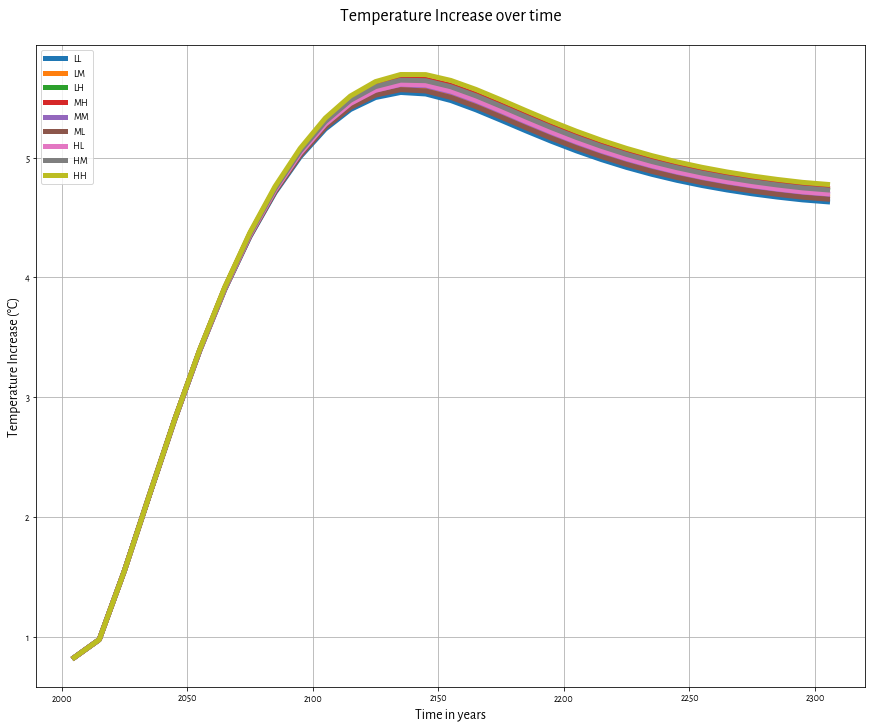

In [7]:
# Set plot
mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(years, ti_df, linewidth=line_with, label= ti_df.columns)
ax_dict["A"].set_title('Temperature Increase over time', fontsize = 18)
ax_dict["A"].set_xlabel('Time in years', fontsize = 14)
ax_dict["A"].set_ylabel('Temperature Increase (°C)', fontsize = 14)

plt.grid()
plt.legend()
plt.savefig(f"results/ti_exp")
plt.show()

## Sigma Value

In [8]:
# Set up dataframes
US_exp_results_sigma = pd.DataFrame()
Europe_exp_results_sigma = pd.DataFrame()
Japan_exp_results_sigma = pd.DataFrame()
Russia_exp_results_sigma = pd.DataFrame()
Eurasia_exp_results_sigma = pd.DataFrame()
China_exp_results_sigma = pd.DataFrame()
India_exp_results_sigma = pd.DataFrame()
ME_exp_results_sigma = pd.DataFrame()
Africa_exp_results_sigma = pd.DataFrame()
LA_exp_results_sigma = pd.DataFrame()
OHI_exp_results_sigma = pd.DataFrame()
Other_Asia_exp_results_sigma = pd.DataFrame()

# Load sigma from every experiment
for exp in range (len(exp_list)):
    t = pd.read_excel(f'results/sigma_{exp_list[exp]}.xlsx', index_col='Unnamed: 0')

    # Filter based on regions
    for region in range(len(regions)):
        c = pd.DataFrame(t.loc[regions[region],:]).rename(columns={f'{regions[region]}':f'{exp_list[exp]}'})
        if regions[region] == 'US':
            US_exp_results_sigma = pd.concat([US_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'OECD-Europe':
            Europe_exp_results_sigma = pd.concat([Europe_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'Japan':
            Japan_exp_results_sigma = pd.concat([Japan_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'Russia':
            Russia_exp_results_sigma = pd.concat([Russia_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'Non-Russia Eurasia':
            Eurasia_exp_results_sigma = pd.concat([Eurasia_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'China':
            China_exp_results_sigma = pd.concat([China_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'India':
            India_exp_results_sigma = pd.concat([India_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'Middle East':
            ME_exp_results_sigma = pd.concat([ME_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'Africa':
            Africa_exp_results_sigma = pd.concat([Africa_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'Latin America':
            LA_exp_results_sigma = pd.concat([LA_exp_results_sigma,c], axis = 1)
        elif regions[region] == 'OHI':
            OHI_exp_results_sigma = pd.concat([OHI_exp_results_sigma,c], axis = 1)
        else:
            Other_Asia_exp_results_sigma = pd.concat([Other_Asia_exp_results_sigma,c], axis = 1)

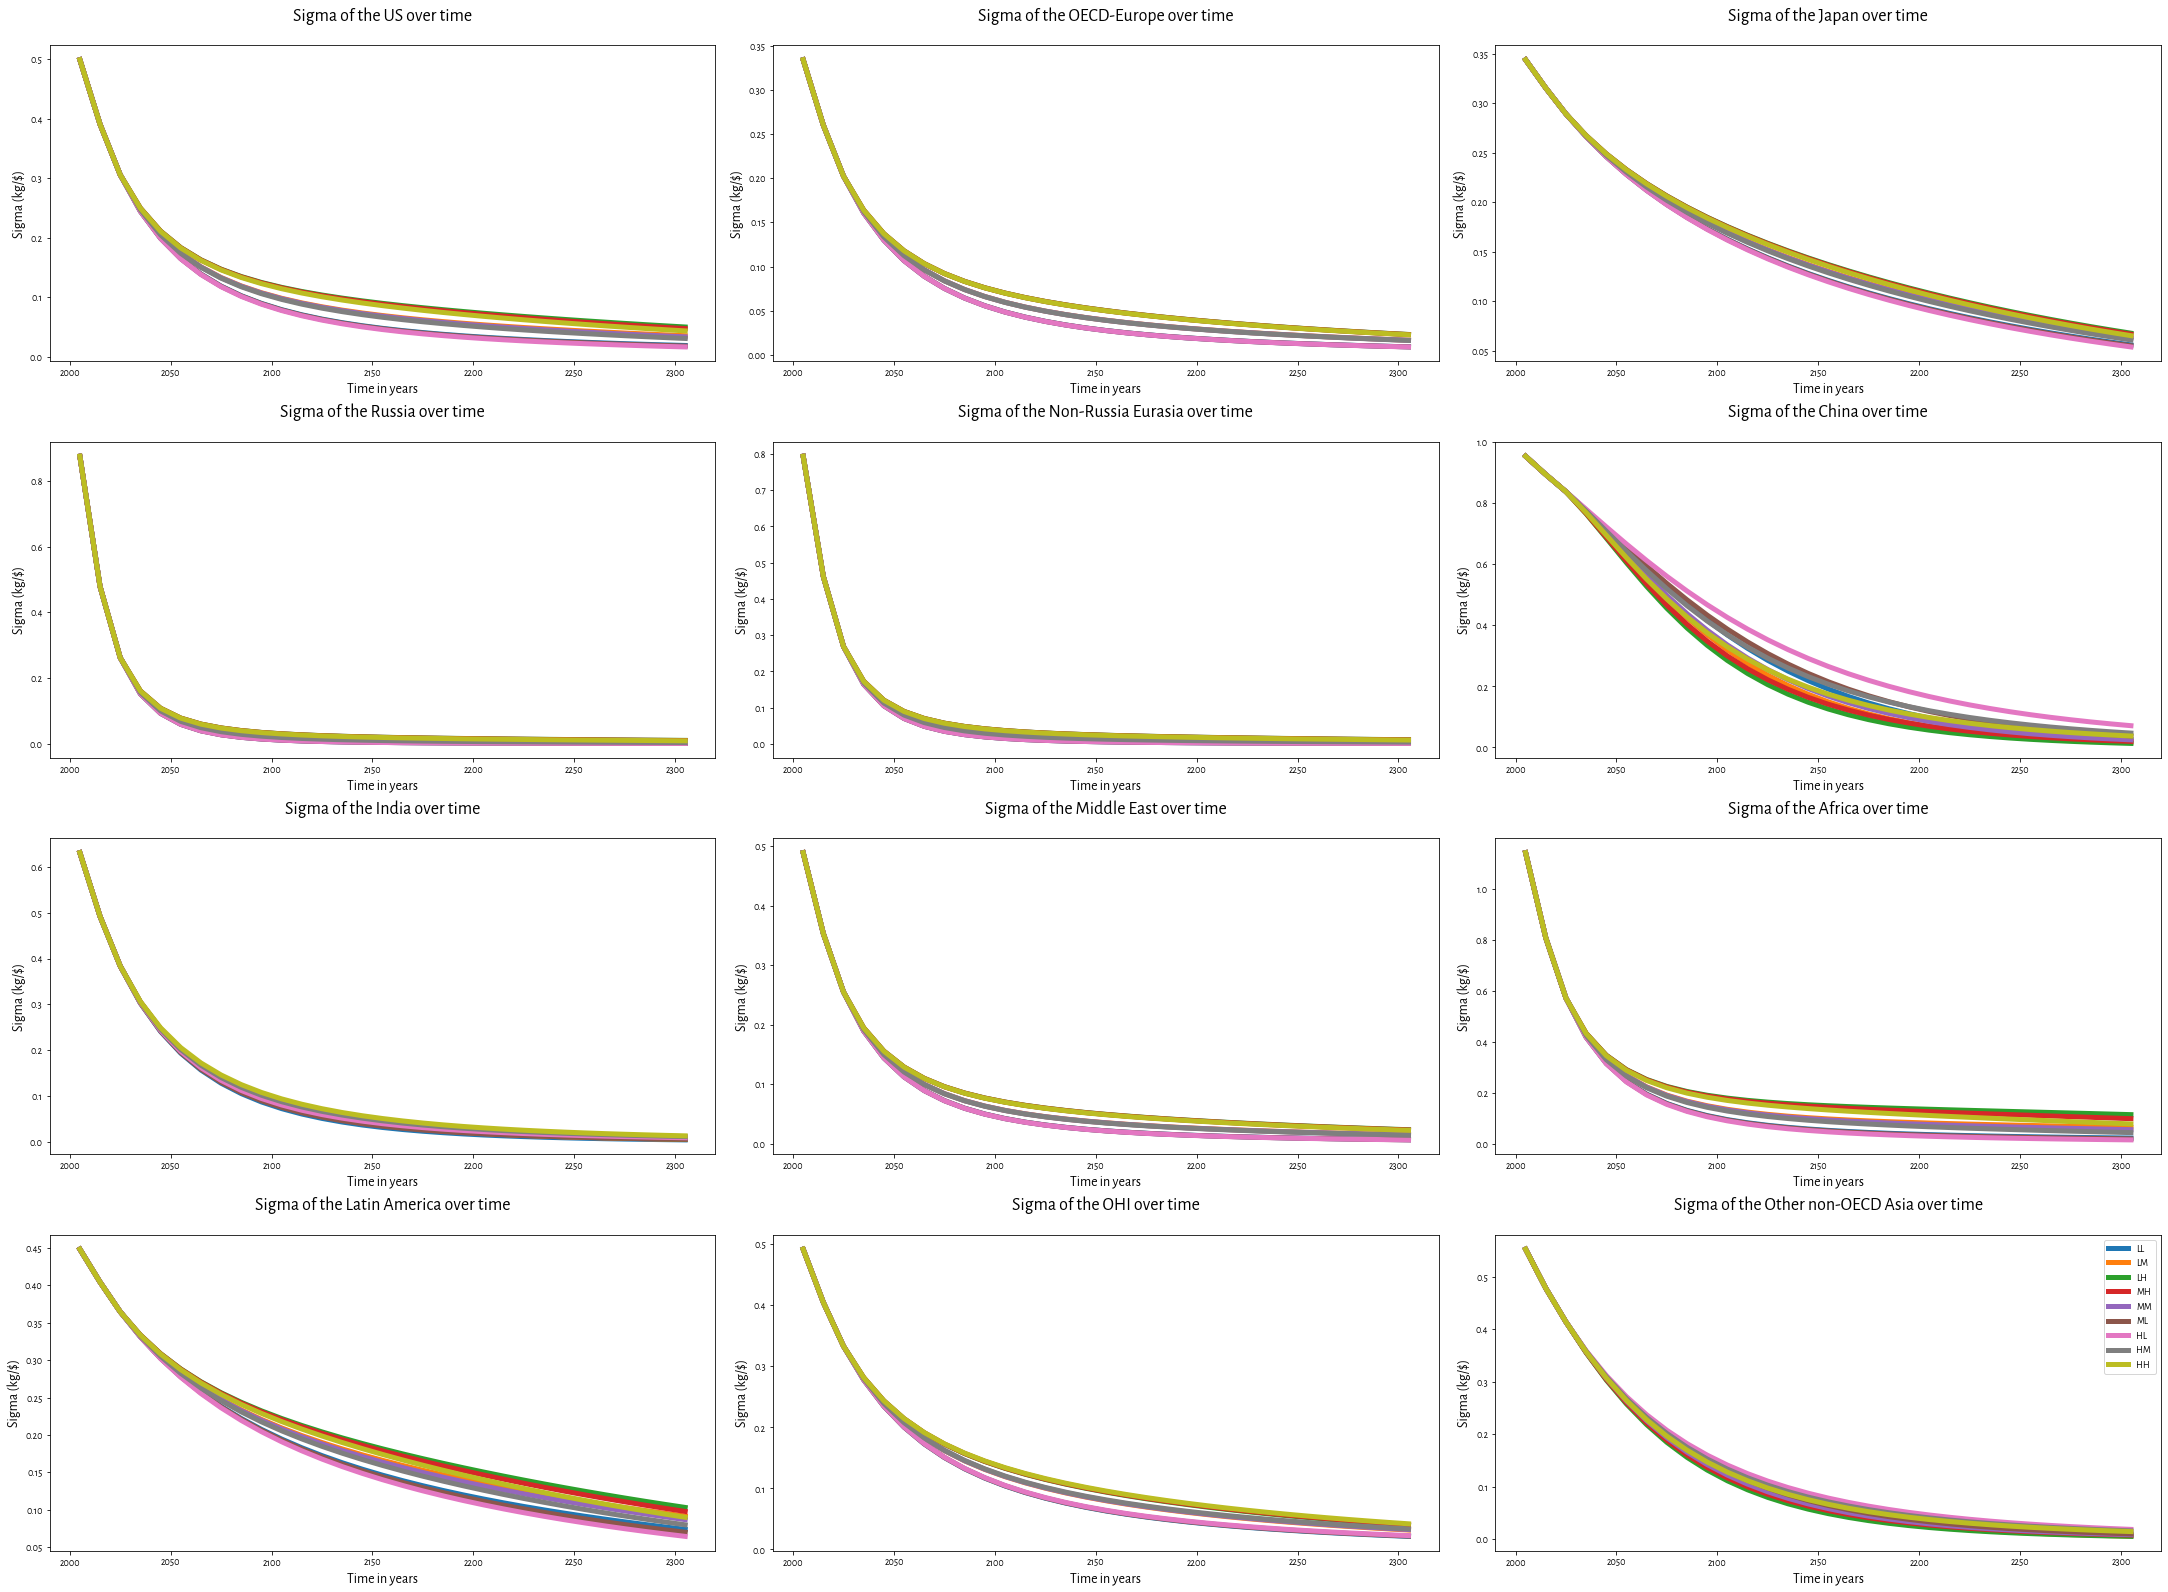

In [9]:
# Set subplots for all regions
mosaic = [
        ["US", "OECD-Europe",'Japan'],
        ["Russia", "Non-Russia Eurasia",'China'],
        ["India","Middle East","Africa"],
        ["Latin America","OHI","Other non-OECD Asia"]
    ]
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(30, 22))
ax_dict = fig.subplot_mosaic(mosaic)

# Plot sigma over time for the US
ax_dict["US"].plot(years, US_exp_results_sigma, linewidth=line_with, label= US_exp_results_sigma.columns)
ax_dict["US"].set_title(f'Sigma of the US over time', fontsize = 18)
ax_dict["US"].set_xlabel('Time in years', fontsize = 14)
ax_dict["US"].set_ylabel('Sigma (kg/$)', fontsize = 14)

# Plot sigma over time for the OECD-Europe
ax_dict["OECD-Europe"].plot(years, Europe_exp_results_sigma, linewidth=line_with, label= Europe_exp_results_sigma.columns)
ax_dict["OECD-Europe"].set_title(f'Sigma of the OECD-Europe over time', fontsize = 18)
ax_dict["OECD-Europe"].set_xlabel('Time in years', fontsize = 14)
ax_dict["OECD-Europe"].set_ylabel('Sigma (kg/$)', fontsize = 14)

# Plot sigma over time for the Japan
ax_dict["Japan"].plot(years, Japan_exp_results_sigma, linewidth=line_with, label= Japan_exp_results_sigma.columns)
ax_dict["Japan"].set_title(f'Sigma of the Japan over time', fontsize = 18)
ax_dict["Japan"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Japan"].set_ylabel('Sigma (kg/$)', fontsize = 14)

# Plot sigma over time for Russia
ax_dict["Russia"].plot(years, Russia_exp_results_sigma, linewidth=line_with, label= Russia_exp_results_sigma.columns)
ax_dict["Russia"].set_title(f'Sigma of the Russia over time', fontsize = 18)
ax_dict["Russia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Russia"].set_ylabel('Sigma (kg/$)', fontsize = 14)

# Plot sigma over time for Non-Russia Eurasia
ax_dict["Non-Russia Eurasia"].plot(years, Eurasia_exp_results_sigma, linewidth=line_with, label= Eurasia_exp_results_sigma.columns)
ax_dict["Non-Russia Eurasia"].set_title(f'Sigma of the Non-Russia Eurasia over time', fontsize = 18)
ax_dict["Non-Russia Eurasia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Non-Russia Eurasia"].set_ylabel('Sigma (kg/$)', fontsize = 14)

# Plot sigma over time for China
ax_dict["China"].plot(years, China_exp_results_sigma, linewidth=line_with, label= China_exp_results_sigma.columns)
ax_dict["China"].set_title(f'Sigma of the China over time', fontsize = 18)
ax_dict["China"].set_xlabel('Time in years', fontsize = 14)
ax_dict["China"].set_ylabel('Sigma (kg/$)', fontsize = 14)

# Plot sigma over time for India
ax_dict["India"].plot(years, India_exp_results_sigma, linewidth=line_with, label= India_exp_results_sigma.columns)
ax_dict["India"].set_title(f'Sigma of the India over time', fontsize = 18)
ax_dict["India"].set_xlabel('Time in years', fontsize = 14)
ax_dict["India"].set_ylabel('Sigma (kg/$)', fontsize = 14)

# Plot sigma over time for the Middle East
ax_dict["Middle East"].plot(years, ME_exp_results_sigma, linewidth=line_with, label= ME_exp_results_sigma.columns)
ax_dict["Middle East"].set_title(f'Sigma of the Middle East over time', fontsize = 18)
ax_dict["Middle East"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Middle East"].set_ylabel('Sigma (kg/$)', fontsize = 14)

# Plot sigma over time for Africa
ax_dict["Africa"].plot(years, Africa_exp_results_sigma, linewidth=line_with, label= Africa_exp_results_sigma.columns)
ax_dict["Africa"].set_title(f'Sigma of the Africa over time', fontsize = 18)
ax_dict["Africa"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Africa"].set_ylabel('Sigma (kg/$)', fontsize = 14)

# Plot sigma over time for Latin America
ax_dict["Latin America"].plot(years, LA_exp_results_sigma, linewidth=line_with, label= LA_exp_results_sigma.columns)
ax_dict["Latin America"].set_title(f'Sigma of the Latin America over time', fontsize = 18)
ax_dict["Latin America"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Latin America"].set_ylabel('Sigma (kg/$)', fontsize = 14)

# Plot sigma over time for the OHI
ax_dict["OHI"].plot(years, OHI_exp_results_sigma, linewidth=line_with, label= OHI_exp_results_sigma.columns)
ax_dict["OHI"].set_title(f'Sigma of the OHI over time', fontsize = 18)
ax_dict["OHI"].set_xlabel('Time in years', fontsize = 14)
ax_dict["OHI"].set_ylabel('Sigma (kg/$)', fontsize = 14)

# Plot sigma over time for the Other non-OECD Asia
ax_dict["Other non-OECD Asia"].plot(years, Other_Asia_exp_results_sigma, linewidth=line_with, label= Other_Asia_exp_results_sigma.columns)
ax_dict["Other non-OECD Asia"].set_title(f'Sigma of the Other non-OECD Asia over time', fontsize = 18)
ax_dict["Other non-OECD Asia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Other non-OECD Asia"].set_ylabel('Sigma (kg/$)', fontsize = 14)


plt.legend()
plt.savefig(f"results/sigma_exp")
plt.show()

## Carbon Intensity

In [10]:
# Set up dataframes
US_exp_results_ci = pd.DataFrame()
Europe_exp_results_ci = pd.DataFrame()
Japan_exp_results_ci = pd.DataFrame()
Russia_exp_results_ci = pd.DataFrame()
Eurasia_exp_results_ci = pd.DataFrame()
China_exp_results_ci = pd.DataFrame()
India_exp_results_ci = pd.DataFrame()
ME_exp_results_ci = pd.DataFrame()
Africa_exp_results_ci = pd.DataFrame()
LA_exp_results_ci = pd.DataFrame()
OHI_exp_results_ci = pd.DataFrame()
Other_Asia_exp_results_ci = pd.DataFrame()

# Load carbon intensity for every experiment
for exp in range (len(exp_list)):
    t = pd.read_excel(f'results/ci_{exp_list[exp]}.xlsx', index_col='Unnamed: 0')

    # Filter based on region
    for region in range(len(regions)):
        c = pd.DataFrame(t.loc[regions[region],:]).rename(columns={f'{regions[region]}':f'{exp_list[exp]}'})
        if regions[region] == 'US':
            US_exp_results_ci = pd.concat([US_exp_results_ci,c], axis = 1)
        elif regions[region] == 'OECD-Europe':
            Europe_exp_results_ci = pd.concat([Europe_exp_results_ci,c], axis = 1)
        elif regions[region] == 'Japan':
            Japan_exp_results_ci = pd.concat([Japan_exp_results_ci,c], axis = 1)
        elif regions[region] == 'Russia':
            Russia_exp_results_ci = pd.concat([Russia_exp_results_ci,c], axis = 1)
        elif regions[region] == 'Non-Russia Eurasia':
            Eurasia_exp_results_ci = pd.concat([Eurasia_exp_results_ci,c], axis = 1)
        elif regions[region] == 'China':
            China_exp_results_ci = pd.concat([China_exp_results_ci,c], axis = 1)
        elif regions[region] == 'India':
            India_exp_results_ci = pd.concat([India_exp_results_ci,c], axis = 1)
        elif regions[region] == 'Middle East':
            ME_exp_results_ci = pd.concat([ME_exp_results_ci,c], axis = 1)
        elif regions[region] == 'Africa':
            Africa_exp_results_ci = pd.concat([Africa_exp_results_ci,c], axis = 1)
        elif regions[region] == 'Latin America':
            LA_exp_results_ci = pd.concat([LA_exp_results_ci,c], axis = 1)
        elif regions[region] == 'OHI':
            OHI_exp_results_ci = pd.concat([OHI_exp_results_ci,c], axis = 1)
        else:
            Other_Asia_exp_results_ci = pd.concat([Other_Asia_exp_results_ci,c], axis = 1)

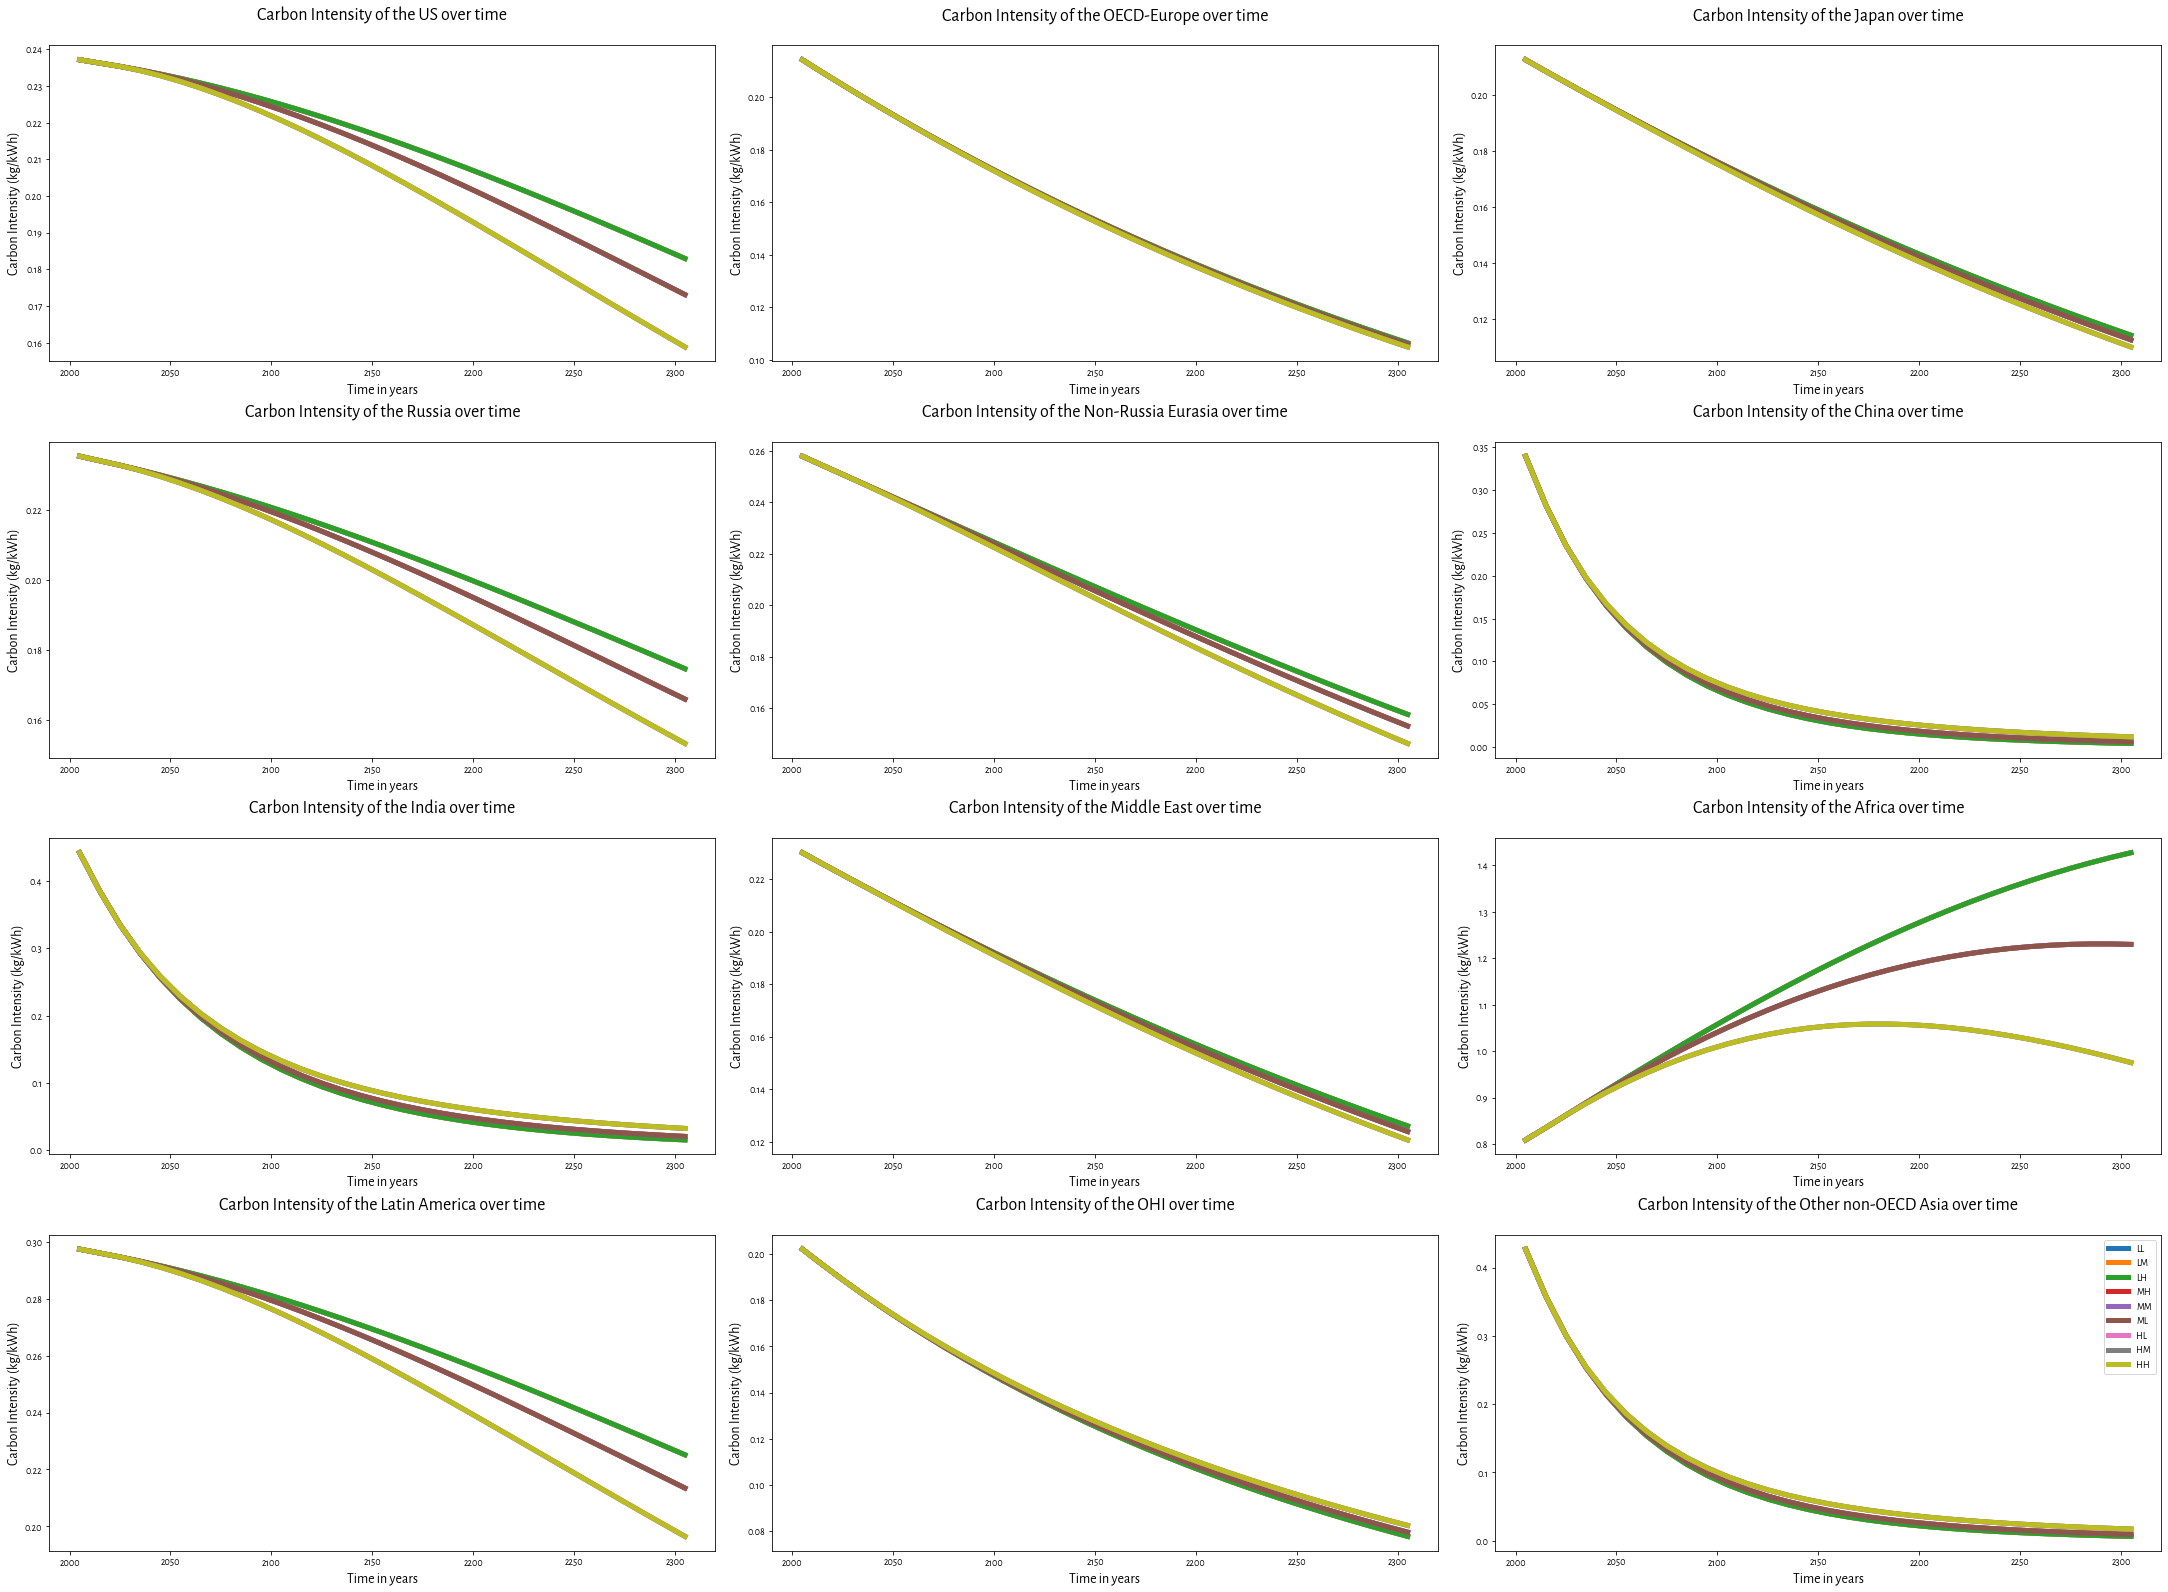

In [11]:
# Set subplots for all regions
mosaic = [
        ["US", "OECD-Europe",'Japan'],
        ["Russia", "Non-Russia Eurasia",'China'],
        ["India","Middle East","Africa"],
        ["Latin America","OHI","Other non-OECD Asia"]
    ]
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(30, 22))
ax_dict = fig.subplot_mosaic(mosaic)

# Plot Carbon Intensity for the US
ax_dict["US"].plot(years, US_exp_results_ci, linewidth=line_with, label= US_exp_results_ci.columns)
ax_dict["US"].set_title(f'Carbon Intensity of the US over time', fontsize = 18)
ax_dict["US"].set_xlabel('Time in years', fontsize = 14)
ax_dict["US"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)

# Plot Carbon Intensity for the OECD-Europe
ax_dict["OECD-Europe"].plot(years, Europe_exp_results_ci, linewidth=line_with, label= Europe_exp_results_ci.columns)
ax_dict["OECD-Europe"].set_title(f'Carbon Intensity of the OECD-Europe over time', fontsize = 18)
ax_dict["OECD-Europe"].set_xlabel('Time in years', fontsize = 14)
ax_dict["OECD-Europe"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)

# Plot Carbon Intensity for Jaoan
ax_dict["Japan"].plot(years, Japan_exp_results_ci, linewidth=line_with, label= Japan_exp_results_ci.columns)
ax_dict["Japan"].set_title(f'Carbon Intensity of the Japan over time', fontsize = 18)
ax_dict["Japan"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Japan"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)

# Plot Carbon Intensity for Russia
ax_dict["Russia"].plot(years, Russia_exp_results_ci, linewidth=line_with, label= Russia_exp_results_ci.columns)
ax_dict["Russia"].set_title(f'Carbon Intensity of the Russia over time', fontsize = 18)
ax_dict["Russia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Russia"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)

# Plot Carbon Intensity for Non-Russia Eurasia
ax_dict["Non-Russia Eurasia"].plot(years, Eurasia_exp_results_ci, linewidth=line_with, label= Eurasia_exp_results_ci.columns)
ax_dict["Non-Russia Eurasia"].set_title(f'Carbon Intensity of the Non-Russia Eurasia over time', fontsize = 18)
ax_dict["Non-Russia Eurasia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Non-Russia Eurasia"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)

# Plot Carbon Intensity for China
ax_dict["China"].plot(years, China_exp_results_ci, linewidth=line_with, label= China_exp_results_ci.columns)
ax_dict["China"].set_title(f'Carbon Intensity of the China over time', fontsize = 18)
ax_dict["China"].set_xlabel('Time in years', fontsize = 14)
ax_dict["China"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)

# Plot Carbon Intensity for India
ax_dict["India"].plot(years, India_exp_results_ci, linewidth=line_with, label= India_exp_results_ci.columns)
ax_dict["India"].set_title(f'Carbon Intensity of the India over time', fontsize = 18)
ax_dict["India"].set_xlabel('Time in years', fontsize = 14)
ax_dict["India"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)

# Plot Carbon Intensity for the Middle East
ax_dict["Middle East"].plot(years, ME_exp_results_ci, linewidth=line_with, label= ME_exp_results_ci.columns)
ax_dict["Middle East"].set_title(f'Carbon Intensity of the Middle East over time', fontsize = 18)
ax_dict["Middle East"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Middle East"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)

# Plot Carbon Intensity for Africa
ax_dict["Africa"].plot(years, Africa_exp_results_ci, linewidth=line_with, label= Africa_exp_results_ci.columns)
ax_dict["Africa"].set_title(f'Carbon Intensity of the Africa over time', fontsize = 18)
ax_dict["Africa"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Africa"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)

# Plot Carbon Intensity for Latin America
ax_dict["Latin America"].plot(years, LA_exp_results_ci, linewidth=line_with, label= LA_exp_results_ci.columns)
ax_dict["Latin America"].set_title(f'Carbon Intensity of the Latin America over time', fontsize = 18)
ax_dict["Latin America"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Latin America"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)

# Plot Carbon Intensity for the OHI
ax_dict["OHI"].plot(years, OHI_exp_results_ci, linewidth=line_with, label= OHI_exp_results_ci.columns)
ax_dict["OHI"].set_title(f'Carbon Intensity of the OHI over time', fontsize = 18)
ax_dict["OHI"].set_xlabel('Time in years', fontsize = 14)
ax_dict["OHI"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)

# Plot Carbon Intensity for Other non-OECD Asia
ax_dict["Other non-OECD Asia"].plot(years, Other_Asia_exp_results_ci, linewidth=line_with, label= Other_Asia_exp_results_ci.columns)
ax_dict["Other non-OECD Asia"].set_title(f'Carbon Intensity of the Other non-OECD Asia over time', fontsize = 18)
ax_dict["Other non-OECD Asia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Other non-OECD Asia"].set_ylabel('Carbon Intensity (kg/kWh)', fontsize = 14)


plt.legend()
plt.savefig(f"results/ci_exp")
plt.show()

## Energy Intensity

In [12]:
# Set up dataframes
US_exp_results_ei = pd.DataFrame()
Europe_exp_results_ei = pd.DataFrame()
Japan_exp_results_ei = pd.DataFrame()
Russia_exp_results_ei = pd.DataFrame()
Eurasia_exp_results_ei = pd.DataFrame()
China_exp_results_ei = pd.DataFrame()
India_exp_results_ei = pd.DataFrame()
ME_exp_results_ei = pd.DataFrame()
Africa_exp_results_ei = pd.DataFrame()
LA_exp_results_ei = pd.DataFrame()
OHI_exp_results_ei = pd.DataFrame()
Other_Asia_exp_results_ei = pd.DataFrame()

# Load Energy Intensity for every experiment
for exp in range (len(exp_list)):
    t = pd.read_excel(f'results/ei_{exp_list[exp]}.xlsx', index_col='Unnamed: 0')

    # Filter based on region
    for region in range(len(regions)):
        c = pd.DataFrame(t.loc[regions[region],:]).rename(columns={f'{regions[region]}':f'{exp_list[exp]}'})
        if regions[region] == 'US':
            US_exp_results_ei = pd.concat([US_exp_results_ei,c], axis = 1)
        elif regions[region] == 'OECD-Europe':
            Europe_exp_results_ei = pd.concat([Europe_exp_results_ei,c], axis = 1)
        elif regions[region] == 'Japan':
            Japan_exp_results_ei = pd.concat([Japan_exp_results_ei,c], axis = 1)
        elif regions[region] == 'Russia':
            Russia_exp_results_ei = pd.concat([Russia_exp_results_ei,c], axis = 1)
        elif regions[region] == 'Non-Russia Eurasia':
            Eurasia_exp_results_ei = pd.concat([Eurasia_exp_results_ei,c], axis = 1)
        elif regions[region] == 'China':
            China_exp_results_ei = pd.concat([China_exp_results_ei,c], axis = 1)
        elif regions[region] == 'India':
            India_exp_results_ei = pd.concat([India_exp_results_ei,c], axis = 1)
        elif regions[region] == 'Middle East':
            ME_exp_results_ei = pd.concat([ME_exp_results_ei,c], axis = 1)
        elif regions[region] == 'Africa':
            Africa_exp_results_ei = pd.concat([Africa_exp_results_ei,c], axis = 1)
        elif regions[region] == 'Latin America':
            LA_exp_results_ei = pd.concat([LA_exp_results_ei,c], axis = 1)
        elif regions[region] == 'OHI':
            OHI_exp_results_ei = pd.concat([OHI_exp_results_ei,c], axis = 1)
        else:
            Other_Asia_exp_results_ei = pd.concat([Other_Asia_exp_results_ei,c], axis = 1)

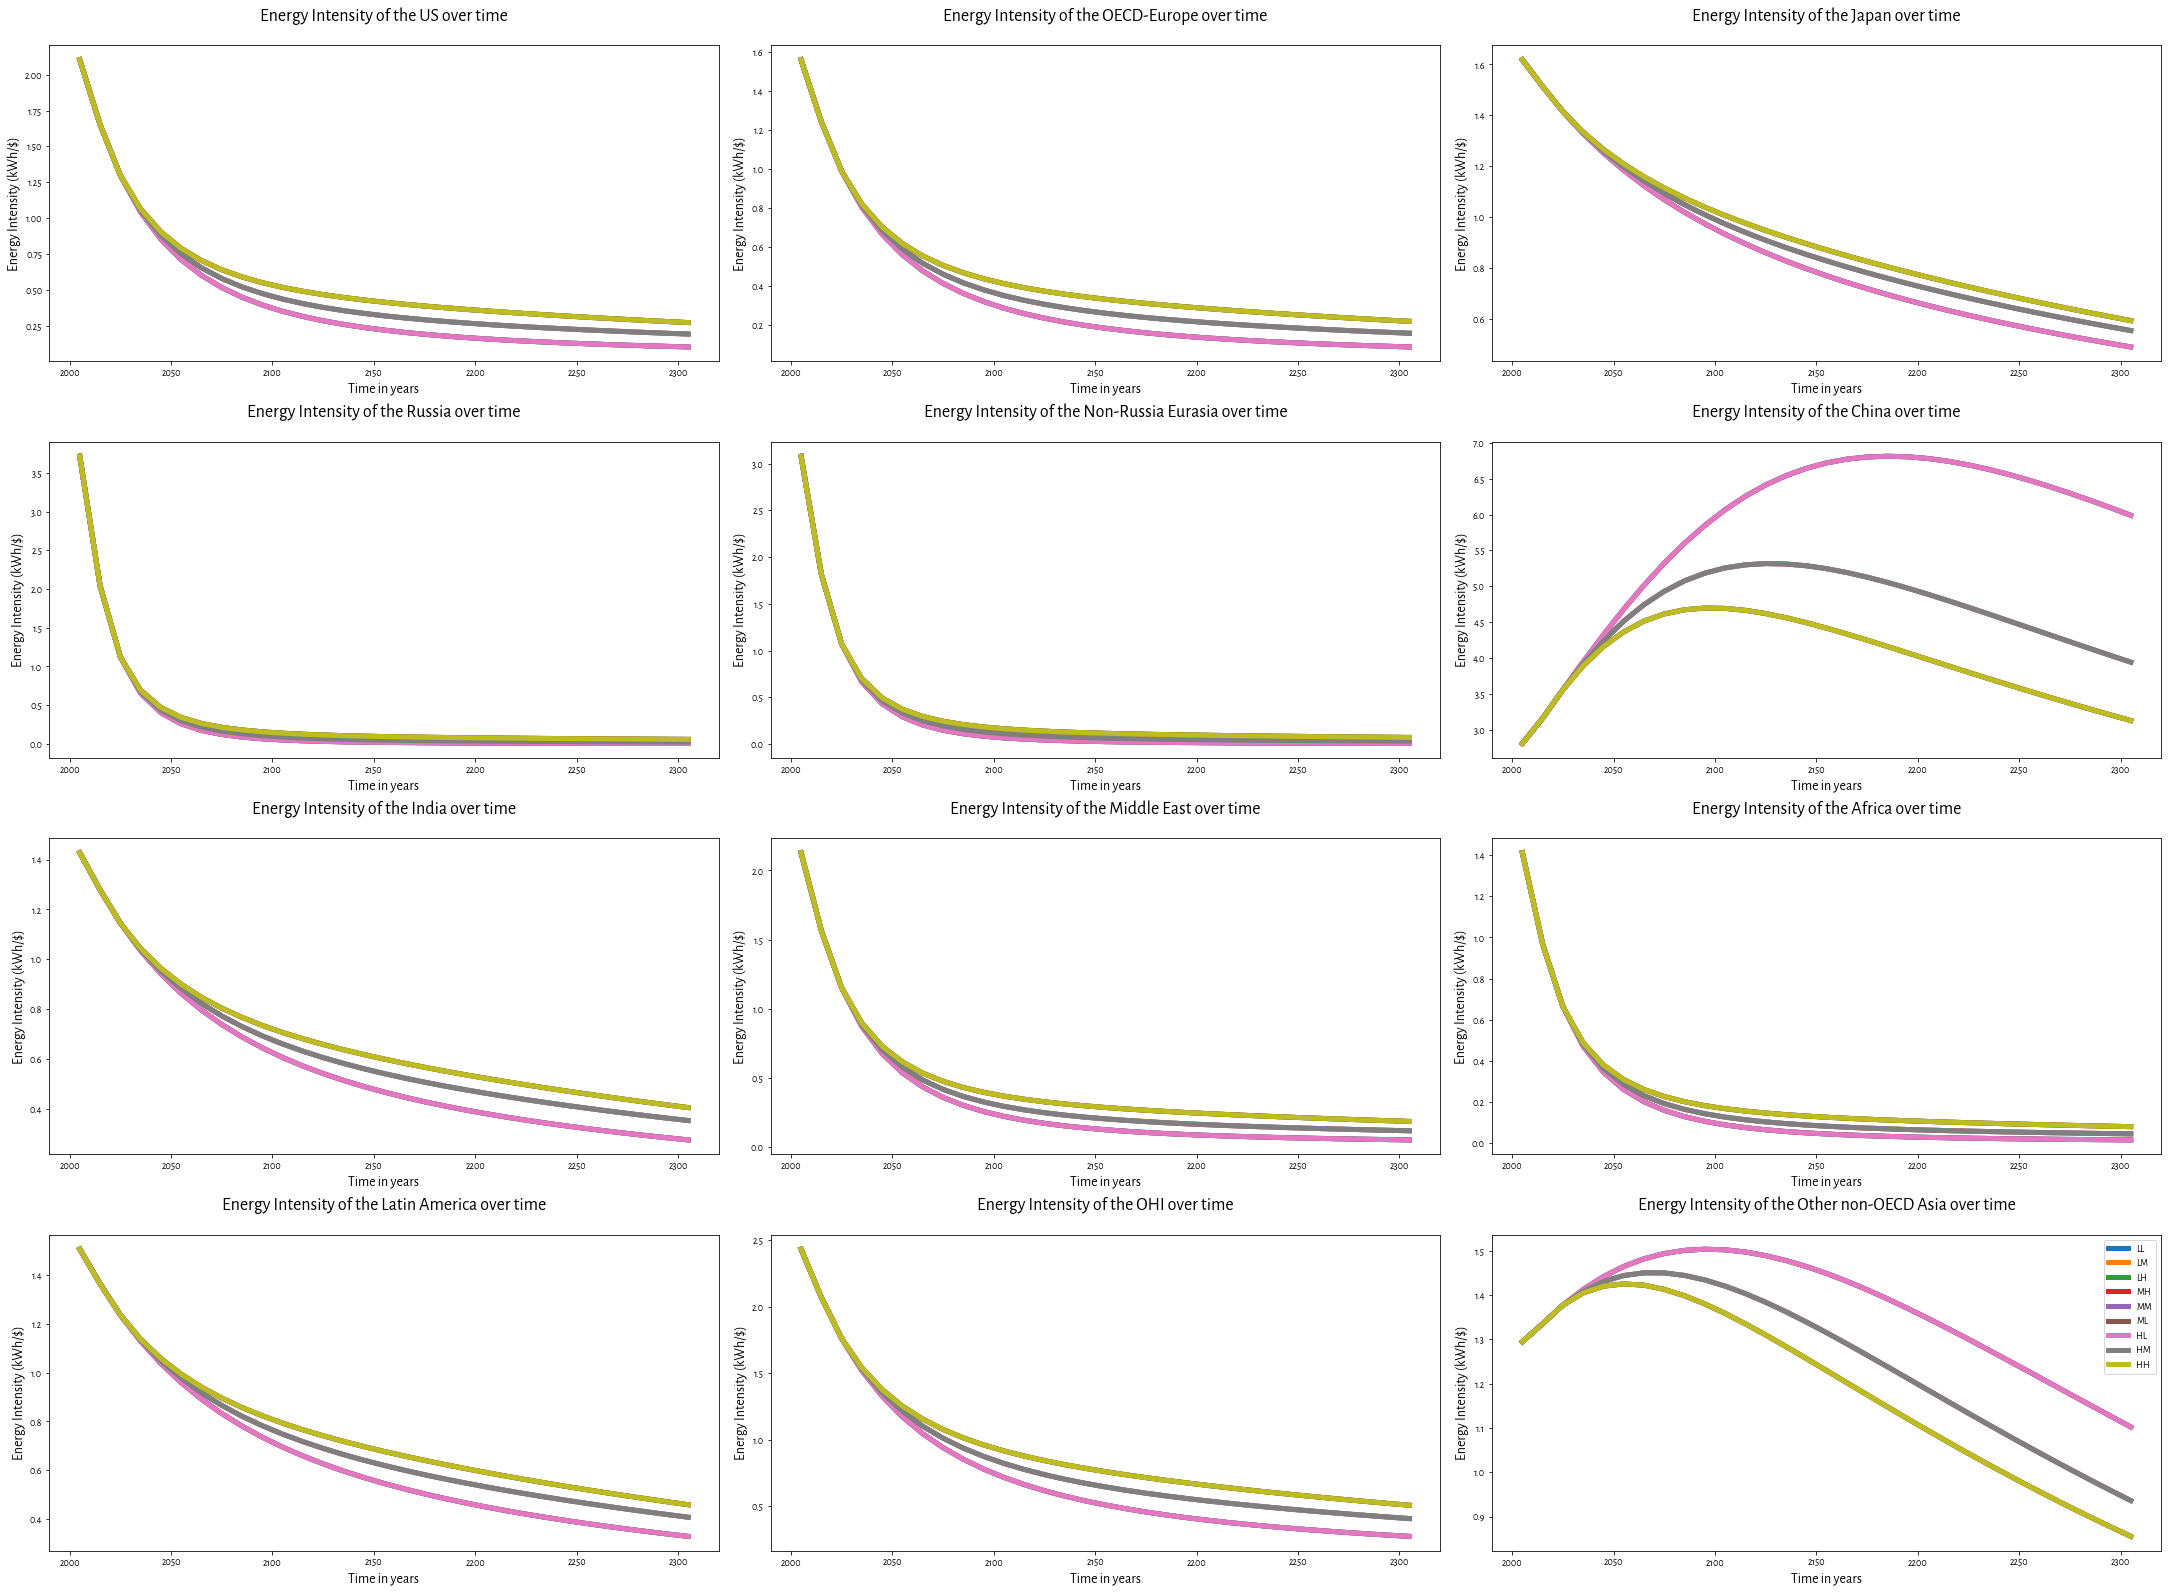

In [13]:
# Set up plot
mosaic = [
        ["US", "OECD-Europe",'Japan'],
        ["Russia", "Non-Russia Eurasia",'China'],
        ["India","Middle East","Africa"],
        ["Latin America","OHI","Other non-OECD Asia"]
    ]
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(30, 22))
ax_dict = fig.subplot_mosaic(mosaic)

# Plot Energy Intensity in the US
ax_dict["US"].plot(years, US_exp_results_ei, linewidth=line_with, label= US_exp_results_ei.columns)
ax_dict["US"].set_title(f'Energy Intensity of the US over time', fontsize = 18)
ax_dict["US"].set_xlabel('Time in years', fontsize = 14)
ax_dict["US"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)

# Plot Energy Intensity in OECD-Europe
ax_dict["OECD-Europe"].plot(years, Europe_exp_results_ei, linewidth=line_with, label= Europe_exp_results_ei.columns)
ax_dict["OECD-Europe"].set_title(f'Energy Intensity of the OECD-Europe over time', fontsize = 18)
ax_dict["OECD-Europe"].set_xlabel('Time in years', fontsize = 14)
ax_dict["OECD-Europe"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)

# Plot Energy Intensity in Japan
ax_dict["Japan"].plot(years, Japan_exp_results_ei, linewidth=line_with, label= Japan_exp_results_ei.columns)
ax_dict["Japan"].set_title(f'Energy Intensity of the Japan over time', fontsize = 18)
ax_dict["Japan"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Japan"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)

# Plot Energy Intensity in Russia
ax_dict["Russia"].plot(years, Russia_exp_results_ei, linewidth=line_with, label= Russia_exp_results_ei.columns)
ax_dict["Russia"].set_title(f'Energy Intensity of the Russia over time', fontsize = 18)
ax_dict["Russia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Russia"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)

# Plot Energy Intensity in Non-Russia Eurasia
ax_dict["Non-Russia Eurasia"].plot(years, Eurasia_exp_results_ei, linewidth=line_with, label= Eurasia_exp_results_ei.columns)
ax_dict["Non-Russia Eurasia"].set_title(f'Energy Intensity of the Non-Russia Eurasia over time', fontsize = 18)
ax_dict["Non-Russia Eurasia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Non-Russia Eurasia"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)

# Plot Energy Intensity in China
ax_dict["China"].plot(years, China_exp_results_ei, linewidth=line_with, label= China_exp_results_ei.columns)
ax_dict["China"].set_title(f'Energy Intensity of the China over time', fontsize = 18)
ax_dict["China"].set_xlabel('Time in years', fontsize = 14)
ax_dict["China"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)

# Plot Energy Intensity in India
ax_dict["India"].plot(years, India_exp_results_ei, linewidth=line_with, label= India_exp_results_ei.columns)
ax_dict["India"].set_title(f'Energy Intensity of the India over time', fontsize = 18)
ax_dict["India"].set_xlabel('Time in years', fontsize = 14)
ax_dict["India"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)

# Plot Energy Intensity in the Middle East
ax_dict["Middle East"].plot(years, ME_exp_results_ei, linewidth=line_with, label= ME_exp_results_ei.columns)
ax_dict["Middle East"].set_title(f'Energy Intensity of the Middle East over time', fontsize = 18)
ax_dict["Middle East"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Middle East"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)

# Plot Energy Intensity in Africa
ax_dict["Africa"].plot(years, Africa_exp_results_ei, linewidth=line_with, label= Africa_exp_results_ei.columns)
ax_dict["Africa"].set_title(f'Energy Intensity of the Africa over time', fontsize = 18)
ax_dict["Africa"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Africa"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)

# Plot Energy Intensity in Latin America
ax_dict["Latin America"].plot(years, LA_exp_results_ei, linewidth=line_with, label= LA_exp_results_ei.columns)
ax_dict["Latin America"].set_title(f'Energy Intensity of the Latin America over time', fontsize = 18)
ax_dict["Latin America"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Latin America"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)

# Plot Energy Intensity in the OHI
ax_dict["OHI"].plot(years, OHI_exp_results_ei, linewidth=line_with, label= OHI_exp_results_ei.columns)
ax_dict["OHI"].set_title(f'Energy Intensity of the OHI over time', fontsize = 18)
ax_dict["OHI"].set_xlabel('Time in years', fontsize = 14)
ax_dict["OHI"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)

# Plot Energy Intensity in Other non-OECD Asia
ax_dict["Other non-OECD Asia"].plot(years, Other_Asia_exp_results_ei, linewidth=line_with, label= Other_Asia_exp_results_ei.columns)
ax_dict["Other non-OECD Asia"].set_title(f'Energy Intensity of the Other non-OECD Asia over time', fontsize = 18)
ax_dict["Other non-OECD Asia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Other non-OECD Asia"].set_ylabel('Energy Intensity (kWh/$)', fontsize = 14)


plt.legend()
plt.savefig(f"results/ei_exp")
plt.show()

## Internal Check: Comparing Sigma vs. CI * EI

In [14]:
# Multiplying results from CI and EI
US_exp_results_ci_ei = US_exp_results_ci * US_exp_results_ei
Europe_exp_results_ci_ei = Europe_exp_results_ci * Europe_exp_results_ei 
Japan_exp_results_ci_ei = Japan_exp_results_ci * Japan_exp_results_ei
Russia_exp_results_ci_ei = Russia_exp_results_ci * Russia_exp_results_ei 
Eurasia_exp_results_ci_ei = Eurasia_exp_results_ci * Eurasia_exp_results_ei
China_exp_results_ci_ei = China_exp_results_ci * China_exp_results_ei 
India_exp_results_ci_ei = India_exp_results_ci * India_exp_results_ei 
ME_exp_results_ci_ei = ME_exp_results_ci * ME_exp_results_ei 
Africa_exp_results_ci_ei = Africa_exp_results_ci * Africa_exp_results_ei 
LA_exp_results_ci_ei = LA_exp_results_ci * LA_exp_results_ei 
OHI_exp_results_ci_ei = OHI_exp_results_ci * OHI_exp_results_ei 
Other_Asia_exp_results_ci_ei = Other_Asia_exp_results_ci * Other_Asia_exp_results_ei

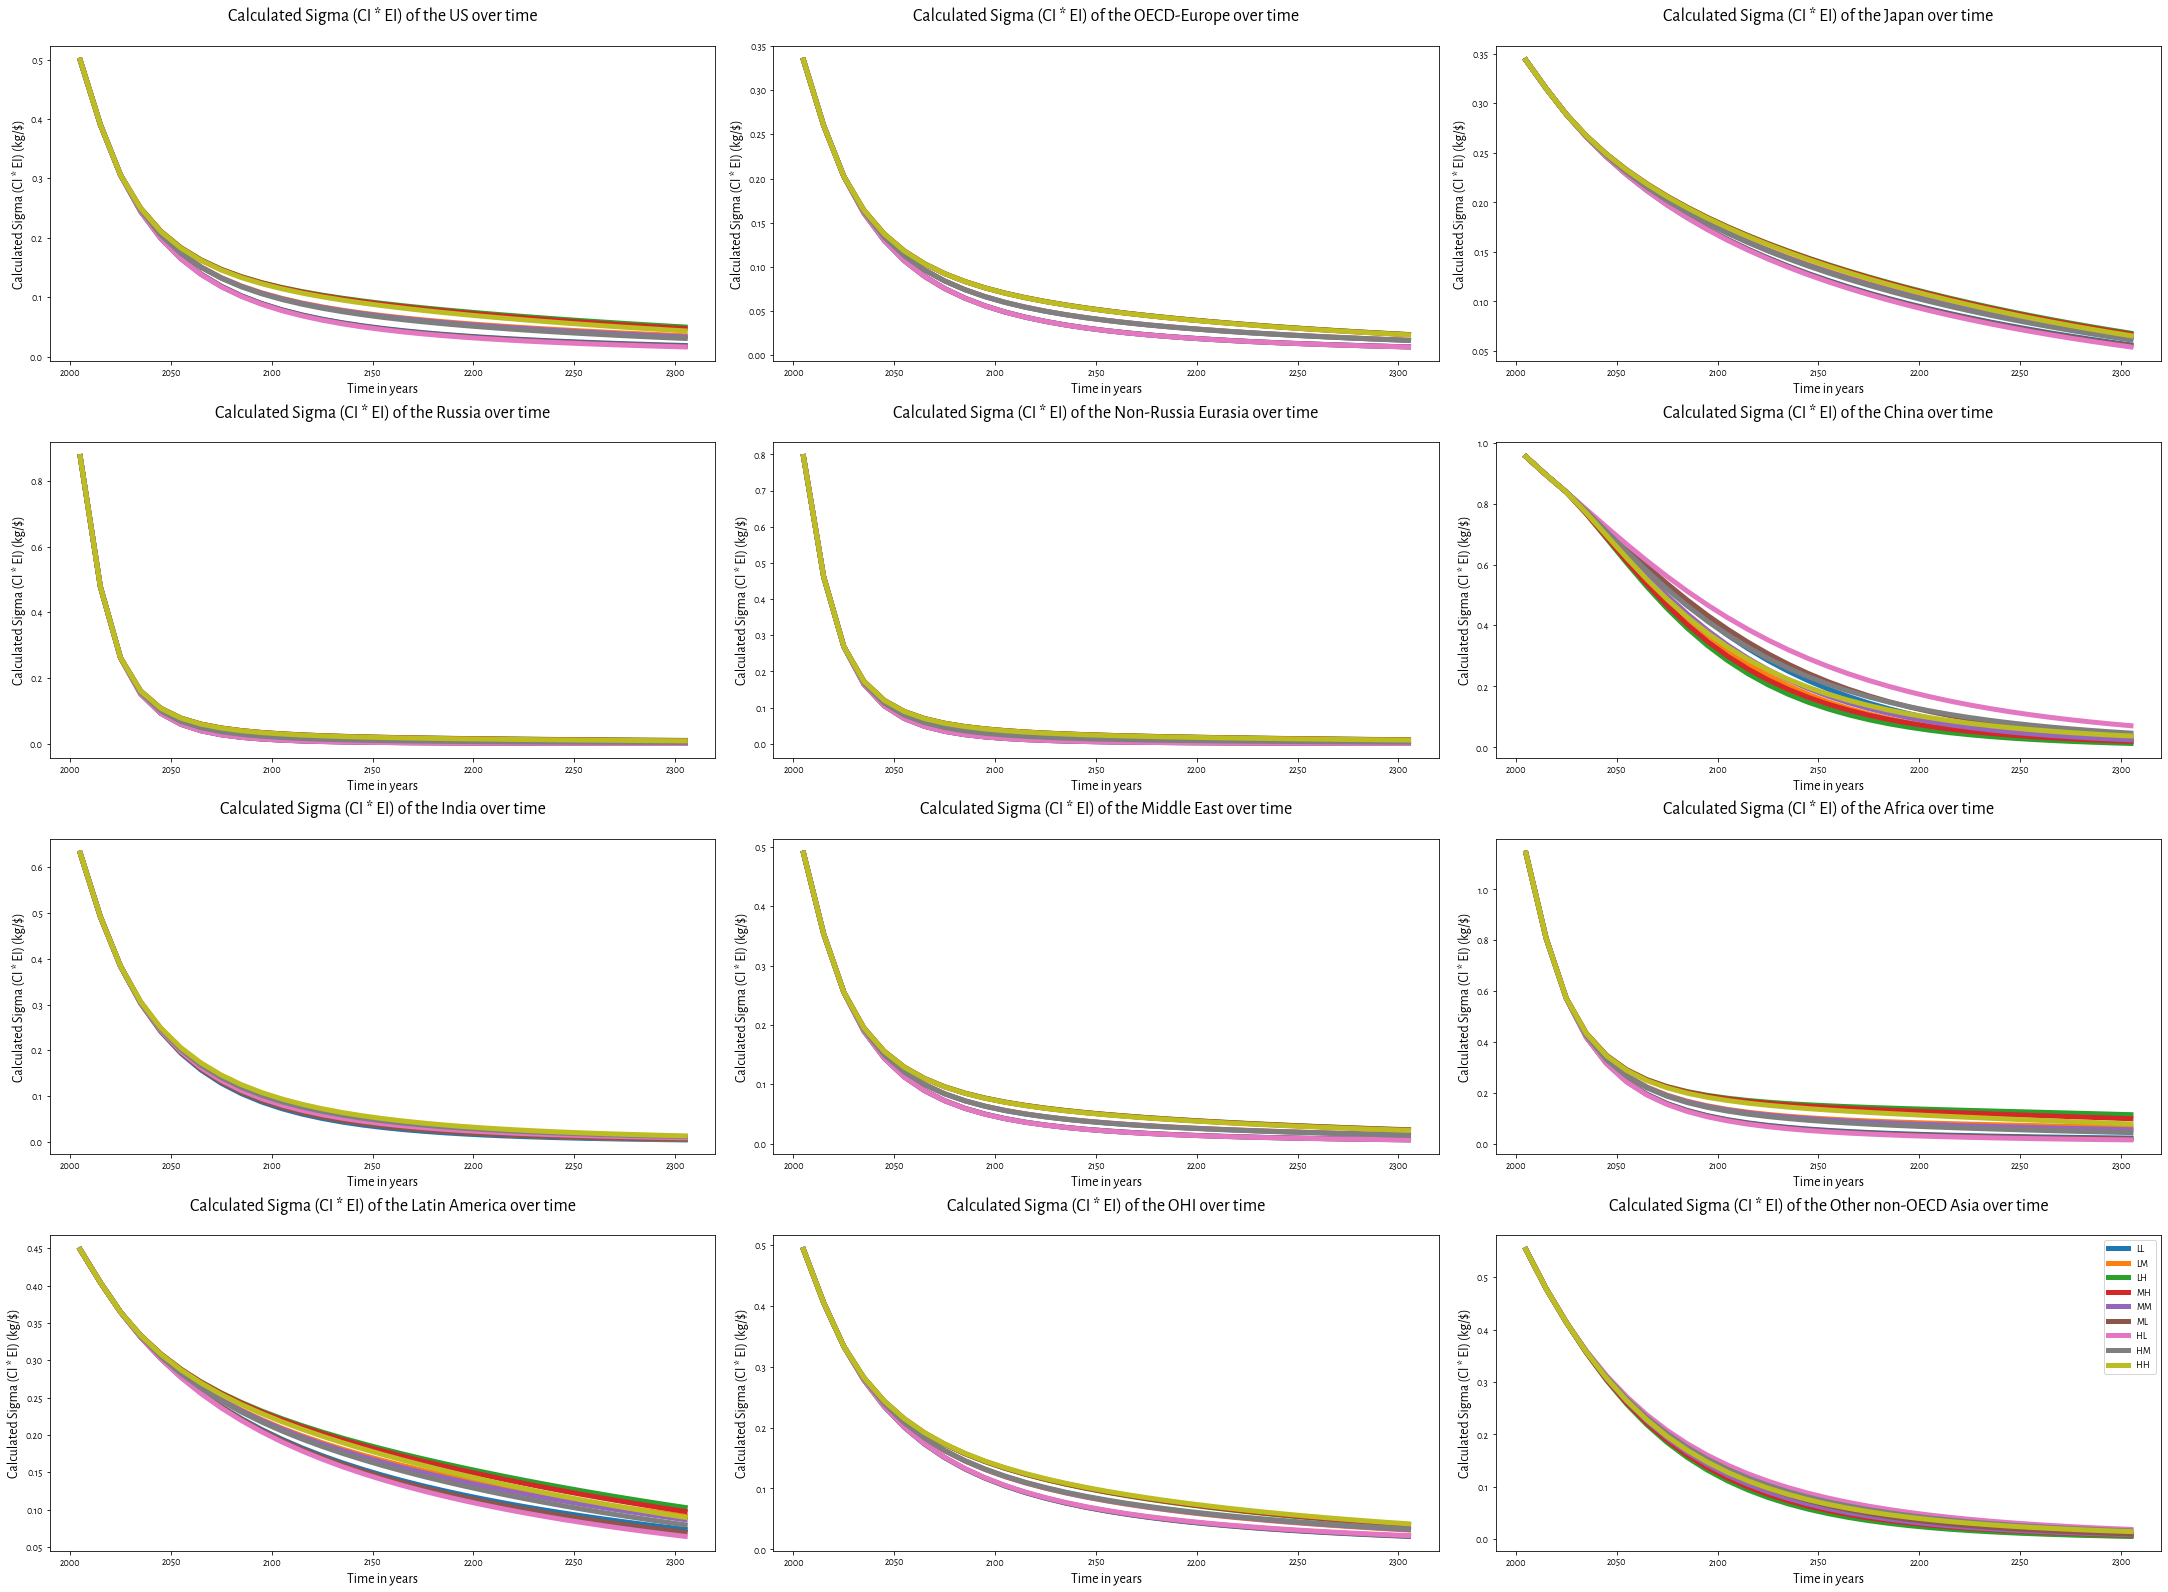

In [15]:
# Set subplots for all regions
mosaic = [
        ["US", "OECD-Europe",'Japan'],
        ["Russia", "Non-Russia Eurasia",'China'],
        ["India","Middle East","Africa"],
        ["Latin America","OHI","Other non-OECD Asia"]
    ]
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(30, 22))
ax_dict = fig.subplot_mosaic(mosaic)

# Plot CI * EI over time for the US
ax_dict["US"].plot(years, US_exp_results_ci_ei, linewidth=line_with, label= US_exp_results_ci_ei.columns)
ax_dict["US"].set_title(f'Calculated Sigma (CI * EI) of the US over time', fontsize = 18)
ax_dict["US"].set_xlabel('Time in years', fontsize = 14)
ax_dict["US"].set_ylabel('Calculated Sigma (CI * EI) (kg/$)', fontsize = 14)

# Plot CI * EI over time for the OECD-Europe
ax_dict["OECD-Europe"].plot(years, Europe_exp_results_ci_ei, linewidth=line_with, label= Europe_exp_results_ci_ei.columns)
ax_dict["OECD-Europe"].set_title(f'Calculated Sigma (CI * EI) of the OECD-Europe over time', fontsize = 18)
ax_dict["OECD-Europe"].set_xlabel('Time in years', fontsize = 14)
ax_dict["OECD-Europe"].set_ylabel('Calculated Sigma (CI * EI) (kg/$)', fontsize = 14)

# Plot CI * EI over time for the Japan
ax_dict["Japan"].plot(years, Japan_exp_results_ci_ei, linewidth=line_with, label= Japan_exp_results_ci_ei.columns)
ax_dict["Japan"].set_title(f'Calculated Sigma (CI * EI) of the Japan over time', fontsize = 18)
ax_dict["Japan"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Japan"].set_ylabel('Calculated Sigma (CI * EI) (kg/$)', fontsize = 14)

# Plot CI * EI over time for Russia
ax_dict["Russia"].plot(years, Russia_exp_results_ci_ei, linewidth=line_with, label= Russia_exp_results_ci_ei.columns)
ax_dict["Russia"].set_title(f'Calculated Sigma (CI * EI) of the Russia over time', fontsize = 18)
ax_dict["Russia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Russia"].set_ylabel('Calculated Sigma (CI * EI) (kg/$)', fontsize = 14)

# Plot CI * EI over time for Non-Russia Eurasia
ax_dict["Non-Russia Eurasia"].plot(years, Eurasia_exp_results_ci_ei, linewidth=line_with, label= Eurasia_exp_results_ci_ei.columns)
ax_dict["Non-Russia Eurasia"].set_title(f'Calculated Sigma (CI * EI) of the Non-Russia Eurasia over time', fontsize = 18)
ax_dict["Non-Russia Eurasia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Non-Russia Eurasia"].set_ylabel('Calculated Sigma (CI * EI) (kg/$)', fontsize = 14)

# Plot CI * EI over time for China
ax_dict["China"].plot(years, China_exp_results_ci_ei, linewidth=line_with, label= China_exp_results_ci_ei.columns)
ax_dict["China"].set_title(f'Calculated Sigma (CI * EI) of the China over time', fontsize = 18)
ax_dict["China"].set_xlabel('Time in years', fontsize = 14)
ax_dict["China"].set_ylabel('Calculated Sigma (CI * EI) (kg/$)', fontsize = 14)

# Plot CI * EI over time for India
ax_dict["India"].plot(years, India_exp_results_ci_ei, linewidth=line_with, label= India_exp_results_ci_ei.columns)
ax_dict["India"].set_title(f'Calculated Sigma (CI * EI) of the India over time', fontsize = 18)
ax_dict["India"].set_xlabel('Time in years', fontsize = 14)
ax_dict["India"].set_ylabel('Calculated Sigma (CI * EI) (kg/$)', fontsize = 14)

# Plot CI * EI over time for the Middle East
ax_dict["Middle East"].plot(years, ME_exp_results_ci_ei, linewidth=line_with, label= ME_exp_results_ci_ei.columns)
ax_dict["Middle East"].set_title(f'Calculated Sigma (CI * EI) of the Middle East over time', fontsize = 18)
ax_dict["Middle East"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Middle East"].set_ylabel('Calculated Sigma (CI * EI) (kg/$)', fontsize = 14)

# Plot CI * EI over time for Africa
ax_dict["Africa"].plot(years, Africa_exp_results_ci_ei, linewidth=line_with, label= Africa_exp_results_ci_ei.columns)
ax_dict["Africa"].set_title(f'Calculated Sigma (CI * EI) of the Africa over time', fontsize = 18)
ax_dict["Africa"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Africa"].set_ylabel('Calculated Sigma (CI * EI) (kg/$)', fontsize = 14)

# Plot CI * EI over time for Latin America
ax_dict["Latin America"].plot(years, LA_exp_results_ci_ei, linewidth=line_with, label= LA_exp_results_ci_ei.columns)
ax_dict["Latin America"].set_title(f'Calculated Sigma (CI * EI) of the Latin America over time', fontsize = 18)
ax_dict["Latin America"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Latin America"].set_ylabel('Calculated Sigma (CI * EI) (kg/$)', fontsize = 14)

# Plot CI * EI over time for the OHI
ax_dict["OHI"].plot(years, OHI_exp_results_ci_ei, linewidth=line_with, label= OHI_exp_results_ci_ei.columns)
ax_dict["OHI"].set_title(f'Calculated Sigma (CI * EI) of the OHI over time', fontsize = 18)
ax_dict["OHI"].set_xlabel('Time in years', fontsize = 14)
ax_dict["OHI"].set_ylabel('Calculated Sigma (CI * EI) (kg/$)', fontsize = 14)

# Plot CI * EI over time for the Other non-OECD Asia
ax_dict["Other non-OECD Asia"].plot(years, Other_Asia_exp_results_ci_ei, linewidth=line_with, label= Other_Asia_exp_results_ci_ei.columns)
ax_dict["Other non-OECD Asia"].set_title(f'Calculated Sigma (CI * EI) of the Other non-OECD Asia over time', fontsize = 18)
ax_dict["Other non-OECD Asia"].set_xlabel('Time in years', fontsize = 14)
ax_dict["Other non-OECD Asia"].set_ylabel('Calculated Sigma (CI * EI) (kg/$)', fontsize = 14)


plt.legend()
plt.savefig(f"results/ciei_exp")
plt.show()

In [16]:
US_exp_results_sigma

,LL,LM,LH,MH,MM,ML,HL,HM,HH
2005,0.499156,0.499156,0.499156,0.499156,0.499156,0.499156,0.499156,0.499156,0.499156
2015,0.390576,0.390576,0.390576,0.390576,0.390576,0.390576,0.390576,0.390576,0.390576
2025,0.305615,0.305615,0.305615,0.305615,0.305615,0.305615,0.305615,0.305615,0.305615
2035,0.244265,0.246923,0.249610,0.249557,0.246871,0.244214,0.244110,0.246767,0.249452
2045,0.198989,0.205001,0.210965,0.210834,0.204873,0.198865,0.198619,0.204619,0.210573
2055,0.164905,0.174164,0.183238,0.183013,0.173951,0.164703,0.164307,0.173533,0.182573
2065,0.138778,0.150887,0.162658,0.162331,0.150583,0.138499,0.137959,0.149996,0.161698
2075,0.118414,0.132903,0.146915,0.146479,0.132509,0.118063,0.117391,0.131755,0.145646
2085,0.102299,0.118715,0.134540,0.133991,0.118231,0.101882,0.101093,0.117315,0.132953
2095,0.089366,0.107309,0.124566,0.123900,0.106735,0.088888,0.087995,0.105663,0.122656
